#Problem Statement
I was contacted by Sidra Hospital, kuwait, to determine the likely hood of heart disease in their patients based on their test results. With the data provided, I'm going to try to predict the potential of heart disease in patients based on the presence of a conbination of the various enzymens within the blood along with other factors usch as gender, smoking habits, diabetes, etc. that can lead to heart failure and subsequently death.
Being able to predict this will enable to prevent heart failure in their patients and save thie lives

The data will be sourced by collecton records of the various test perfroemd on patients that happend to pass away from heart failure. Using this date ill try to make a pipleline that can predcit hear failure in patients



(https: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction//))

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sn
from sklearn.metrics import classification_report

#loading DataSets and Data Exploraton
I used the following functions in this stage, .shape, .dtypes(),.isnull().sum(). I wanted ro explore my data to check how many rows and columns I had, along with the amount of rows/columns that had missing values. And as you can see all all columns and rows are filled so I don't need to perform any preprocessing on the data. I also used .dtypes to check the type of daya in each column and rowbecuase I wanted to make sure there weren't any categorical variable as that would convert them to numerical data.

In [3]:
heart = pd.read_csv("heart_failure.csv")
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
heart.shape

(299, 13)

In [5]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
heart.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

#Scaling Data and Splitting in to Train set and Test set
I seperated the data in to X and Y before scaling. I dropped 'time' because I didnt think it would help in the prediction output. I only scaled the X_test and X_train because I would be using then for the svc model as it perfom better on scaled data since it is sensitive to it.



In [7]:
#declaring x and y variables
X = heart.drop(['DEATH_EVENT', 'time'], axis = 'columns')
y = heart['DEATH_EVENT']

In [8]:
#splitting into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 40)

In [14]:
scaler_1 = StandardScaler().fit(X_train)
scaler_2 = StandardScaler().fit(X_test)
scaled_X_train = scaler_1.transform(X_train)
scaled_X_test = scaler_2.transform(X_test)

#Model Testing
Im testing model using the following SVC, Decision Tree and Random Forest. They are all classification models and I'm hoping that since im trying to determine whether a patient will get heart failure or not, they would be helpful.

#SVC
I tried out SVC before tuning and the accuracy score was 68% but upon tuning, the score only went up to 70%. But the recall also increased to 90.  I tried setting the verbose to 3, but the score with and without is the same.


In [15]:
#SVC before hp tuning
svc_model1 = SVC()
svc_model1.fit(scaled_X_train, y_train)

pred_svc = svc_model1.predict(scaled_X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        40
           1       0.54      0.35      0.42        20

    accuracy                           0.68        60
   macro avg       0.63      0.60      0.60        60
weighted avg       0.66      0.68      0.66        60



In [44]:
#after Hp tuning
parameter = {
    'C' : [0.1, 1, 10,100,1000],
    'gamma' : [1,0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf']
}

cv_grid = GridSearchCV(SVC(), parameter, refit = True)
cv_grid.fit(scaled_X_train, y_train)

print(cv_grid.best_params_)
print(cv_grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [45]:
#score after HP tunning
pred_para=cv_grid.predict(scaled_X_test)
print(classification_report(y_test, pred_para))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        40
           1       0.60      0.30      0.40        20

    accuracy                           0.70        60
   macro avg       0.66      0.60      0.60        60
weighted avg       0.68      0.70      0.67        60



#Decision Tree
Decison Tree I wanted to see the best max_depth between 1 and 12. so i created a for loop. I used r2_score to measure the fit of the mode to my data. the score was 0.025 which means its not a great fit. Using a classification report, i wanted to check its recall and precision. I tuned it and tried it again but the r2 score became negative. so ive concluded that its not a good fit for my data. I didnt use the scalled data here since it doesnt affect the performance of the model.


In [36]:
#decision tree
for max_depth in range (1,12):
  tree_model = DecisionTreeClassifier(max_depth=max_depth)
  tree_model.fit(X_train, y_train)
  pred1 = tree_model.predict(X_test)
  print(r2_score(y_test, pred1))
  print(mean_squared_error(y_test, pred1))
  print(classification_report(y_test, pred1))

-0.4249999999999998
0.31666666666666665
              precision    recall  f1-score   support

           0       0.73      0.82      0.78        40
           1       0.53      0.40      0.46        20

    accuracy                           0.68        60
   macro avg       0.63      0.61      0.62        60
weighted avg       0.67      0.68      0.67        60

-0.12499999999999978
0.25
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        40
           1       0.61      0.70      0.65        20

    accuracy                           0.75        60
   macro avg       0.72      0.74      0.73        60
weighted avg       0.76      0.75      0.75        60

-0.04999999999999982
0.23333333333333334
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        40
           1       0.67      0.60      0.63        20

    accuracy                           0.77        60
   macro avg       0.

In [46]:
#tunning decision tree
para1 = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(1,12)
}

d_tree = GridSearchCV(DecisionTreeClassifier(), para1, scoring = 'accuracy', cv=5, n_jobs=1)
tuned=d_tree.fit(X_train, y_train)
print(d_tree.best_score_)
print(d_tree.best_estimator_)

0.7736702127659575
DecisionTreeClassifier(max_depth=3)


In [51]:
#testing with new tuned parameters
new_tune_train =tuned.predict(X_train)
new_tune_test =tuned.predict(X_test)
test_score=accuracy_score(y_test, new_tune_test)
print(r2_score(y_test, new_tune_test))
print(test_score)

-0.04999999999999982
0.7666666666666667


#Random Forest

Random Forest
I peromed tuning to determin the best max_depth and estimator to use before running the model and came up with a result of 6 for max_depth and 20 n estimtor. On running this, I got an accuracy score of 92% which shows that it is the best fit for my data. So choosing this algorithm since it had the highest score I perfom the same on the test set, and got 70% which means I have a minor priblem of over fitting. I also didnt use the scaled data here as it reacts the same as the decision tree

In [41]:
#random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pre_train = rf_model.predict(X_train)
pre_test = rf_model.predict(X_test)

param2 = {
    'n_estimators' : [10,20,30,40],
    'max_depth' : [1,3,6,9]
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid = param2)
selected_param=rf_grid.fit(X_train, y_train)
print(rf_grid.best_score_)
print(rf_grid.best_estimator_)

0.7656028368794325
RandomForestClassifier(max_depth=6, n_estimators=20)


In [53]:
#ran_forest = RandomForestClassifier(max_depth = 3, n_estimators = 20)
#MODEL ASSESSMENT
train_s=selected_param.predict(X_train)
test_s=selected_param.predict(X_test)

score_train=accuracy_score(y_train,train_s )
score_test=accuracy_score(y_test,test_s )

mean_train=mean_squared_error(y_train,train_s )
mean_test=mean_squared_error(y_train,train_s )
print(score_train)
print(mean_train)
print(score_test)
print(mean_test)
#problem of minor overfitting

0.9288702928870293
0.07112970711297072
0.7
0.07112970711297072


#Data Visualisation

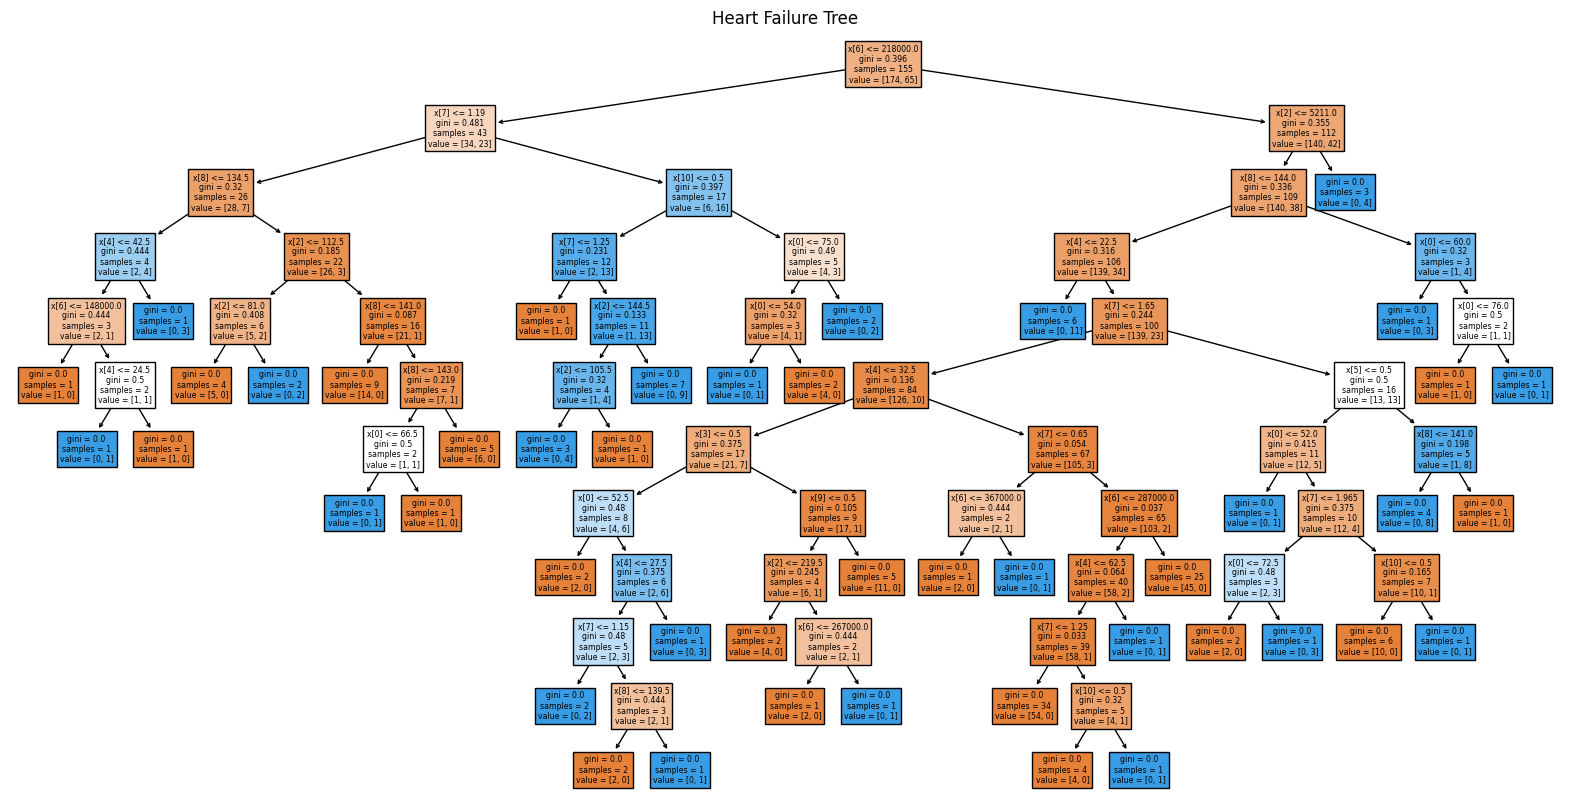

In [76]:
class_RF = RandomForestClassifier(n_estimators=20, random_state=42)
class_RF.fit(X_train,y_train)

tree = class_RF.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True)
plt.title('Heart Failure Tree')
plt.show()

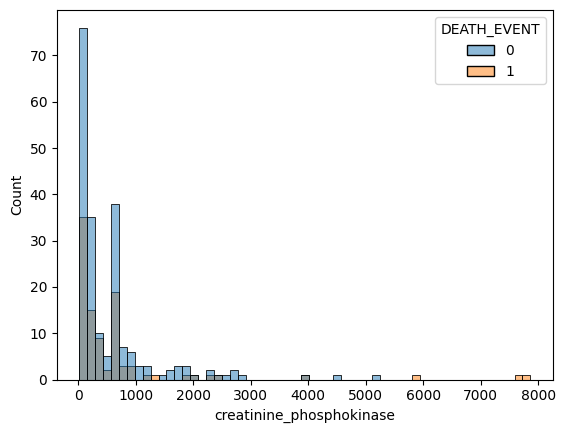

In [56]:
sn.histplot(x='creatinine_phosphokinase', hue = 'DEATH_EVENT', data=heart)
plt.show()

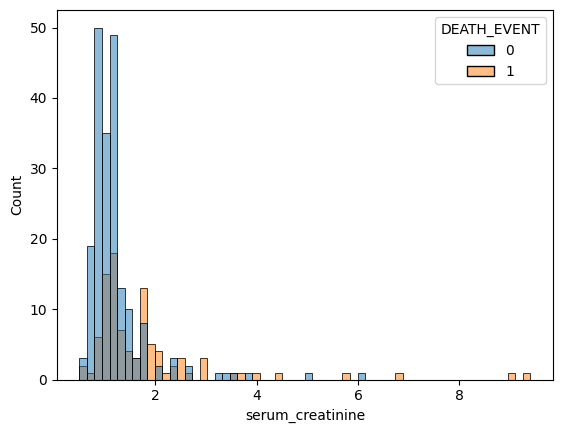

In [58]:
sn.histplot(x='serum_creatinine', hue = 'DEATH_EVENT', data = heart)
plt.show()

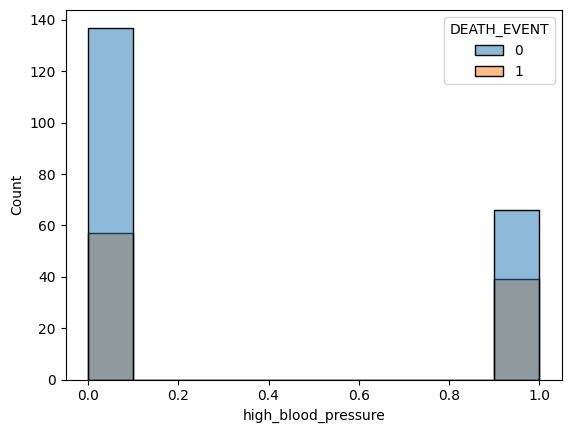

In [59]:
#there is no co relation between heart failure and high blood pressure/ high blood pressure alone does not result in heart failure
sn.histplot(x='high_blood_pressure', hue = 'DEATH_EVENT', data = heart)
plt.show()

#Conclusion and Recommendation
Conclusion
The best model of all the ones I chose for my dataset is the Random forest because it fits well with the training data but not as well with the testing data. It created a prblem with overfitting. When i tried to change the percentage of test by decreasing/increasing it, it reduced the accuracy of the model. The lowest it got to was around 80 percent with the test value being around 66%

Recommendations
on comparing some key columns with death event I'll make the following recommendations:
As seen on the graph, the relationship between age and death event is pretty standard. But when comparing to death event with other factors such as creatinine phosphokinase, serum creatinine, and high_blood pressure we can notice some
for instance, there isnt much death when creatinine phosphokinase is at 1000, but when its increased in the blood, there is cases of death but not much. While the rate of death in patients with increased serum creatinine is much more. And there is no relationship between high blood pressue and the rate of deaths. So the hospitals should pay close attention to patients with high creatinine phosphokinase and serum creatinine since there is a likely hood of heart failure if care isnt taken.

#REFERENCE
1. GeeksforGeeks. 2023. SVM Hyperparameter Tuning using GridSearchCV | ML - GeeksforGeeks. [ONLINE] Available at: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/. [Accessed 21 September 2023].

2. GeeksforGeeks. 2023. Random Forest Hyperparameter Tuning in Python - GeeksforGeeks. [ONLINE] Available at: https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/. [Accessed 21 September 2023].

3. YouTube. 2023. How To visualize Decision Tree In Random Forest- Machine Learning - YouTube. [ONLINE] Available at: https://www.youtube.com/watch?v=WQ0iJSbnnZA. [Accessed 21 September 2023].

4. GeeksforGeeks. 2023. Random Forest Regression in Python - GeeksforGeeks. [ONLINE] Available at: https://www.geeksforgeeks.org/random-forest-regression-in-python/. [Accessed 21 September 2023].

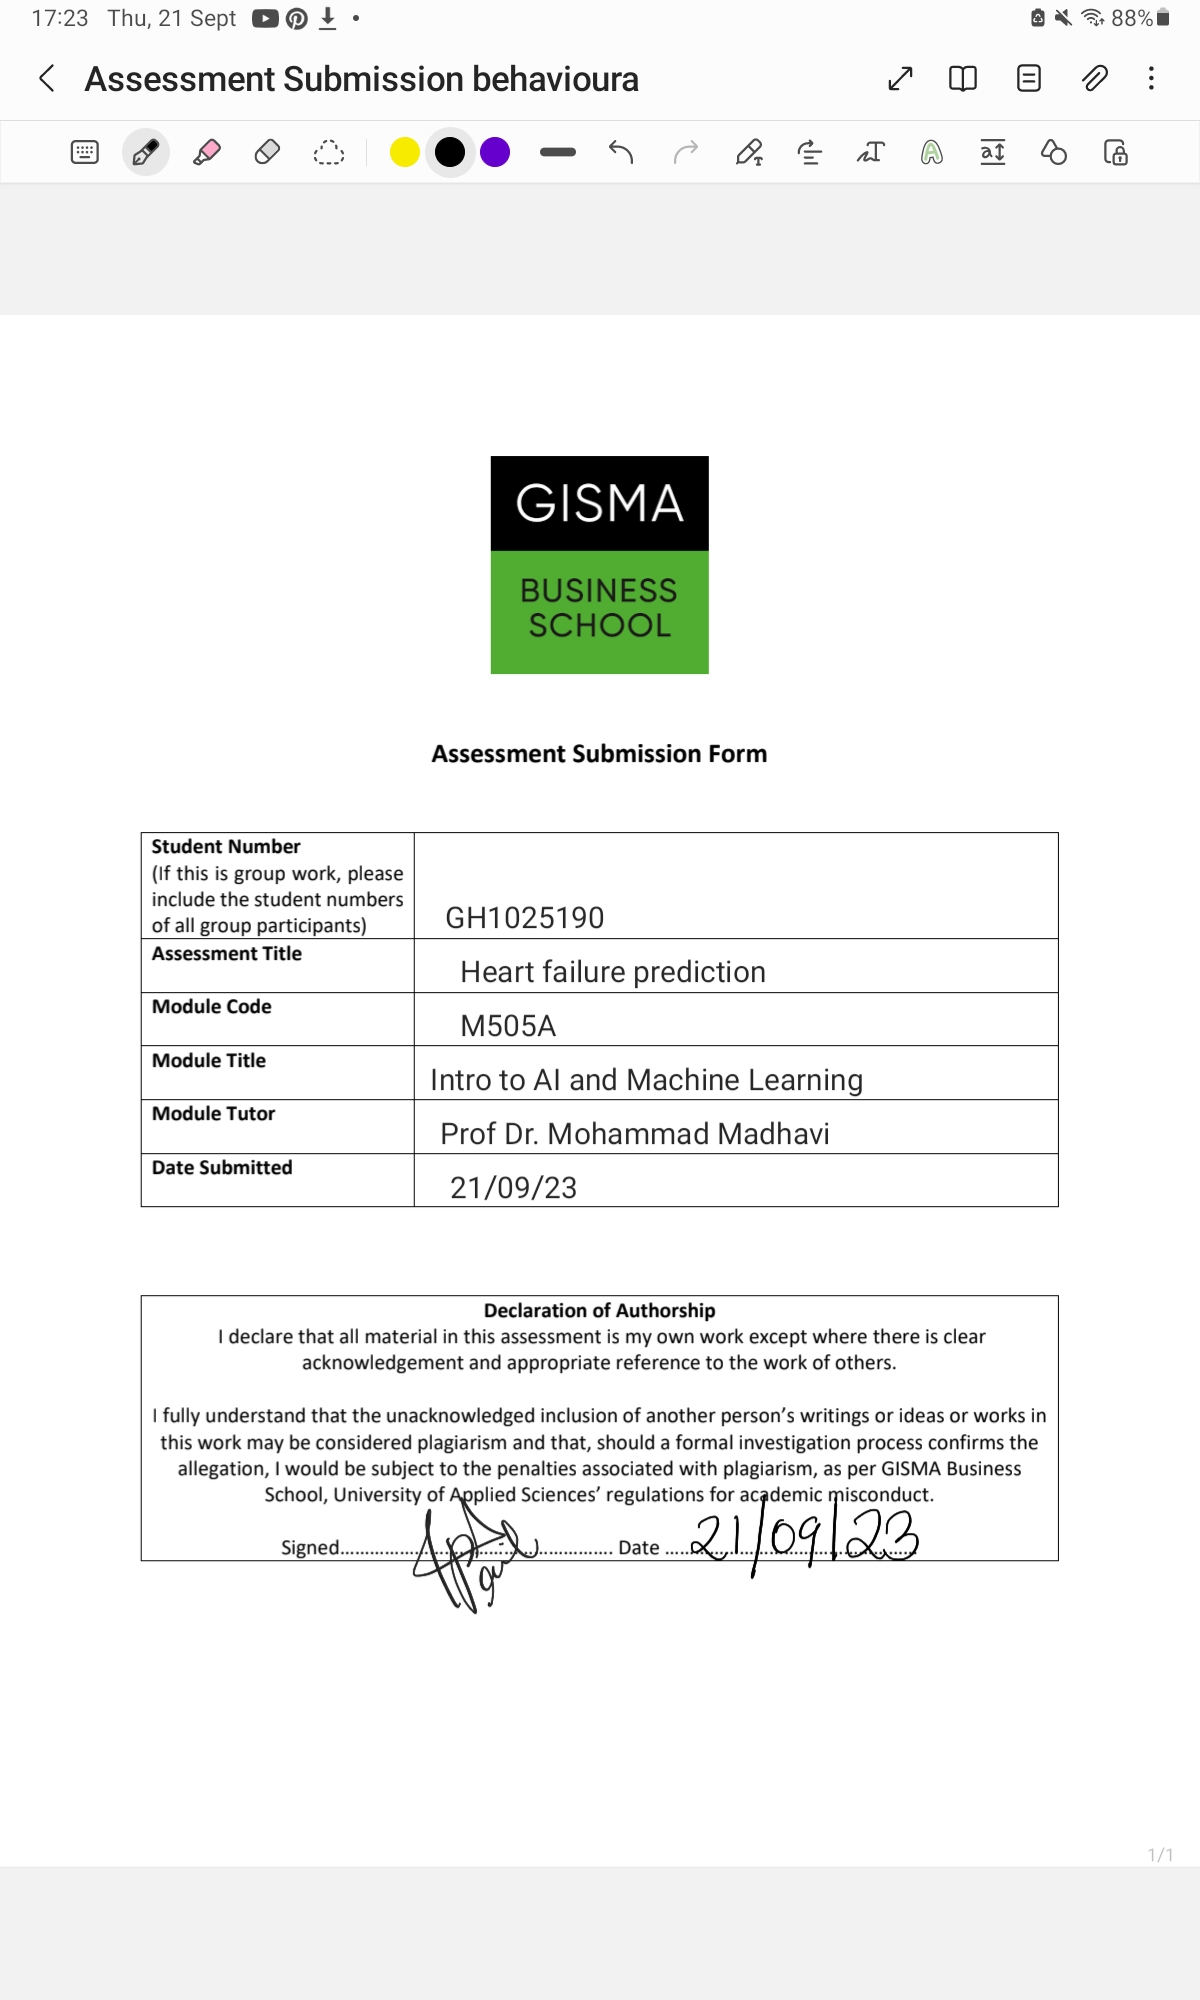